##### $\hspace{15pt}$ **Filename: autoML2of2.ipynb**
##### $\hspace{1.5pt}$ **Date Created: October 17, 2023**
##### **Date Modified: May 11, 2024**
##### $\rule{10.5in}{1pt}$
##### **Train and test predictive models on the [heart disease prediction dataset](https://www.kaggle.com/datasets/moazeldsokyx/heart-disease) from Kaggle using `auto-sklearn`.**

##### **The training and testing of predictive models using `auto-sklearn` are separately done in this notebook because of some issues that arise when `auto-sklearn` is used in the same notebook with the other AutoML libraries.**

##### **Before running this notebook in Colab, either change the path to access the files `train.csv` and `test.csv`, or create the subfolder `/Colab Notebooks/003_autoML` in your Google drive and copy the two `csv` files to the subfolder. Restart the runtime after installing the packages and before running the remaining cells of the notebook.**

##### $\rule{10.5in}{1pt}$

##### Install `auto-sklearn`. The installation in Colab does not work when running `!pip install auto-sklearn`. A sequence of steps that does work is available from this [GitHub issue](https://github.com/automl/auto-sklearn/issues/1684).

In [ ]:
!pip install Cython==0.29.36 -q
!pip uninstall scipy -q -y
!pip install scipy==1.9 -q
!pip uninstall pyparsing -q -y
!pip install pyparsing==2.4 -q
!pip uninstall scikit_learn -q -y
!pip uninstall imbalanced-learn -q -y
!pip uninstall mlxtend -q -y
!pip uninstall yellowbrick -q -y
!pip install scikit-learn==0.24.2 --no-build-isolation -q
!pip install auto-sklearn -q

##### Restart the runtime, and load modules and packages.

In [1]:
from google.colab import drive
from sklearn import metrics
from sklearn.inspection import permutation_importance
import autosklearn.classification
import autosklearn.ensembles
import matplotlib.pyplot as plt
import pandas as pd
import pickle

##### Set pandas dataframes to display all the columns.

In [2]:
pd.set_option("display.max_columns", None)

##### Set the float format of pandas dataframes.

In [3]:
pd.options.display.float_format = "{:.4f}".format

##### Mount Google Drive to Colab.

In [4]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


##### Set the path to access the files needed by this notebook.

In [5]:
path = "gdrive/MyDrive/Colab Notebooks/003_autoML/"

##### Load the train and test sets from Google Drive.

In [6]:
trainSet = pd.read_csv(path + "train.csv")
testSet = pd.read_csv(path + "test.csv")

##### Rearrange the columns in the train and test sets so that the numerical features are adjacent and the categorical features are also adjacent.

In [7]:
numericalFeatures = ["age", "trestbps", "chol", "thalach", "oldpeak", "slope", "ca"]
categoricalFeatures = ["sex", "cp", "fbs", "restecg", "exang", "thal"]

rearrangedTrainSet = trainSet[numericalFeatures + categoricalFeatures + ["target"]]
rearrangedTestSet = testSet[numericalFeatures + categoricalFeatures + ["target"]]

##### Note: The features *slope* and *ca* will be treated as ordinal and will consequently be included among the numerical features.

##### Create models, fit them to the training set, and choose the best model.

In [8]:
autoSklearnModels = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task = 900, ensemble_class = autosklearn.ensembles.SingleBest,
                                                                     memory_limit = 10000, resampling_strategy = "cv",
                                                                     resampling_strategy_arguments = {"folds": 10})

xTrain = rearrangedTrainSet.drop(columns = ["target"])
yTrain = rearrangedTrainSet[["target"]]
featuresType = ["Numerical"]*len(numericalFeatures) + ["Categorical"]*len(categoricalFeatures)
autoSklearnModels.fit(X = xTrain.to_numpy(), y = yTrain.to_numpy(), feat_type = featuresType, dataset_name = "trainSet")

[WARNING] [2024-05-10 21:17:59,573:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2024-05-10 21:18:13,952:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2024-05-10 21:18:20,173:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2024-05-10 21:18:32,665:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2024-05-10 21:18:43,704:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2024-05-10 21:19:00,712:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] 

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.singlebest_ensemble.SingleBest'>,
                      memory_limit=10000, per_run_time_limit=90,
                      resampling_strategy='cv',
                      resampling_strategy_arguments={'folds': 10},
                      time_left_for_this_task=900)

##### Display statistics of the training of models.

In [9]:
print(autoSklearnModels.sprint_statistics())

auto-sklearn results:
  Dataset name: trainSet
  Metric: accuracy
  Best validation score: 1.000000
  Number of target algorithm runs: 46
  Number of successful target algorithm runs: 42
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 4
  Number of target algorithms that exceeded the memory limit: 0



##### Display all the models trained during the search process.

In [10]:
trainedModels = autoSklearnModels.leaderboard(ensemble_only = False)
trainedModels.sort_values(by = ['rank'], inplace = True)
trainedModels

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
2,1,1.0000,random_forest,0.0000,10.2812
42,2,0.0000,gradient_boosting,0.0000,17.2523
34,3,0.0000,k_nearest_neighbors,0.0000,3.2612
31,4,0.0000,gradient_boosting,0.0000,13.4454
29,5,0.0000,extra_trees,0.0000,10.1012
26,6,0.0000,mlp,0.0000,20.8444
21,7,0.0000,gradient_boosting,0.0000,11.8474
19,8,0.0000,extra_trees,0.0000,12.0590
17,9,0.0000,mlp,0.0000,26.3768


##### Display the best model.

In [11]:
autoSklearnModels.leaderboard()

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
2,1,1.0000,random_forest,0.0000,10.2812


In [12]:
autoSklearnModels.show_models()

{2: {'model_id': 2,
  'rank': 1,
  'cost': 0.0,
  'ensemble_weight': 1.0,
  'voting_model': VotingClassifier(estimators=None, voting='soft'),
  'estimators': [{'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7b732f7ea290>,
    'balancing': Balancing(random_state=1),
    'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7b732f82df90>,
    'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7b732f82fac0>,
    'sklearn_classifier': RandomForestClassifier(max_features=4, n_estimators=512, n_jobs=1,
                           random_state=1, warm_start=True)},
   {'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7b732f622530>,
    'balancing': Balancing(random_state=1),
    'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7b732f623ee0>,


##### Predict on test set.

In [13]:
xTest = rearrangedTestSet.drop(columns = ["target"])
predictionLabels = autoSklearnModels.predict(xTest.to_numpy())
predictionScores = autoSklearnModels.predict_proba(xTest.to_numpy())[:, 1]

testSetPredictions = xTest.copy()
testSetPredictions["prediction_label"] = predictionLabels
testSetPredictions["prediction_score"] = predictionScores
testSetPredictions.head()

,age,trestbps,chol,thalach,oldpeak,slope,ca,sex,cp,fbs,restecg,exang,thal,prediction_label,prediction_score
0,63,145,233,150,2.3000,0,0,1,3,1,0,0,1,1,0.9754
1,37,130,250,187,3.5000,0,0,1,2,0,1,0,2,1,0.9676
2,41,130,204,172,1.4000,2,0,0,1,0,0,0,2,1,0.9973
3,56,120,236,178,0.8000,2,0,1,1,0,1,0,2,1,0.9949
4,57,120,354,163,0.6000,2,0,0,0,0,1,1,2,1,0.9738


##### Plot confusion matrix.

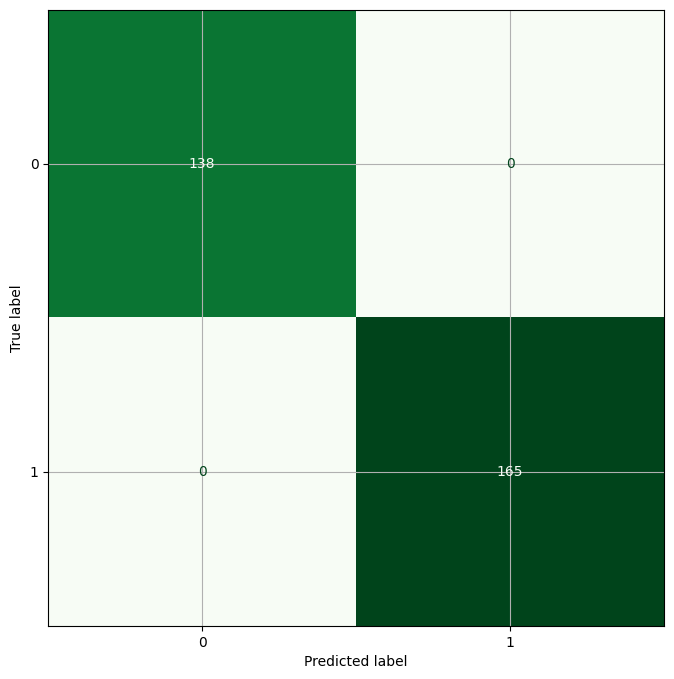

In [14]:
yTest = rearrangedTestSet["target"]
yPred = testSetPredictions["prediction_label"]
confusionMatrix = metrics.confusion_matrix(yTest, yPred)

plt.rcParams["figure.figsize"] = [12, 8]
display = metrics.ConfusionMatrixDisplay(confusionMatrix)
display.plot(cmap = plt.cm.Greens, colorbar = False)
plt.grid(None)
plt.show()

##### Plot ROC curve.

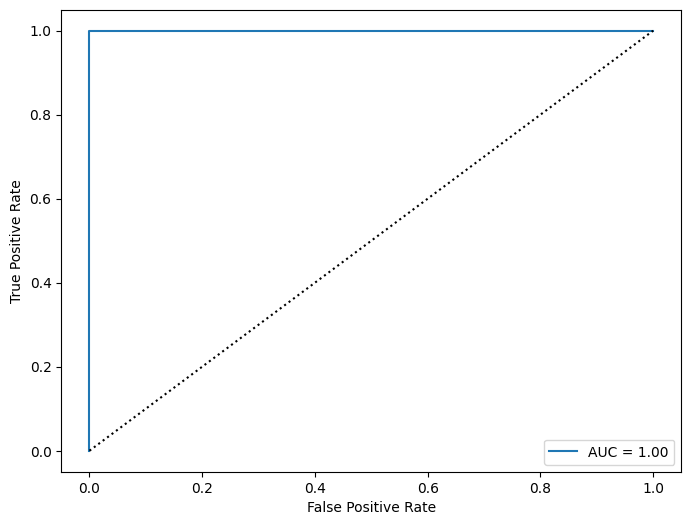

In [15]:
plt.rcParams["figure.figsize"] = [8, 6]
fpr, tpr, thresholds = metrics.roc_curve(yTest, predictionScores)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc)
display.plot()
plt.plot([0, 1], [0, 1], linestyle = "dotted", color = "black")
plt.show()

##### Plot permutation importance of the features.

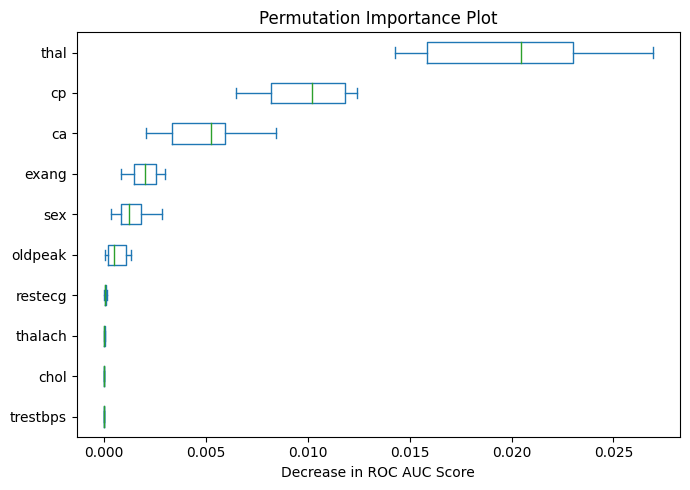

In [16]:
result = permutation_importance(autoSklearnModels, xTest, yTest, n_repeats = 10, random_state = 1, scoring = "roc_auc")
sortedIdx = result.importances_mean.argsort()
importances = pd.DataFrame(result.importances[sortedIdx].T, columns = xTest.columns[sortedIdx])
columns = list(importances.columns)
topImportances = importances[columns[(len(columns) - 10):]]

plt.rcParams["figure.figsize"] = [7, 5]
ax = topImportances.plot.box(vert = False)
ax.set_title("Permutation Importance Plot")
ax.set_xlabel("Decrease in ROC AUC Score")
ax.figure.tight_layout()

##### Save best model.

In [17]:
pickle.dump(autoSklearnModels, open(path + "autoSklearnBestModel.pkl", "wb"))

##### Load best model.

In [18]:
loadedAutoSklearnBestModel = pickle.load(open(path + "autoSklearnBestModel.pkl", "rb"))

Back to the notebook [**autoML1of2.ipynb**](https://colab.research.google.com/drive/11_xYY1-zCRo13LW-gKwJk3_XBbMSDwp5?usp=drive_link).